In [33]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import RandomBrightness, RandomFlip, RandomRotation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import os
import warnings
warnings.filterwarnings('ignore')

In [34]:
!nvidia-smi

Mon Jun  3 22:37:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.17                 Driver Version: 546.17       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...  WDDM  | 00000000:06:00.0  On |                  N/A |
| 37%   51C    P0              49W / 125W |   1484MiB /  6144MiB |      2%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Text(0.5, 1.0, 'Enfeksiyonel')

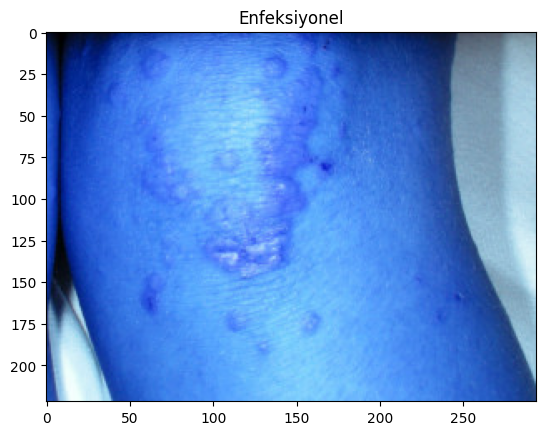

In [35]:
img = cv2.imread('./kaggle/input/skin-diseases/kaggle/train/1. Enfeksiyonel/0_20.jpg')
plt.imshow(img)
plt.title('Enfeksiyonel')

Text(0.5, 1.0, 'Ekzama')

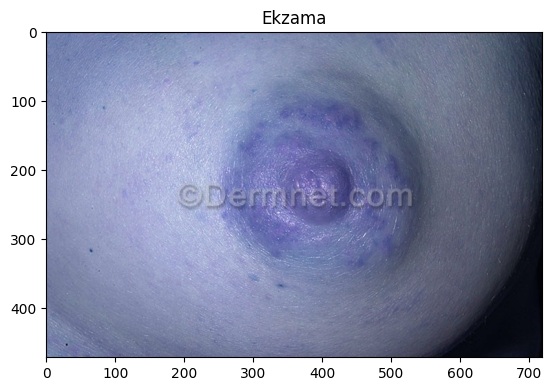

In [36]:
img = cv2.imread('./kaggle/input/skin-diseases/kaggle/train/2. Ekzama/05AtopicAreola3.jpg')
plt.imshow(img)
plt.title('Ekzama')

Text(0.5, 1.0, 'Akne')

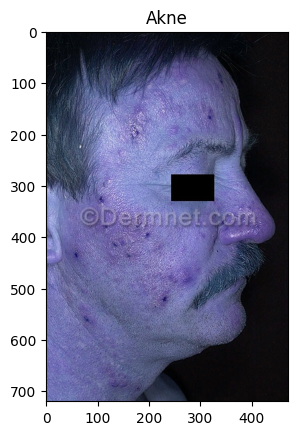

In [37]:
img = cv2.imread('./kaggle/input/skin-diseases/kaggle/train/3. Akne/07RosaceaK0216.jpg')
plt.imshow(img)
plt.title('Akne')

Text(0.5, 1.0, 'Pigment')

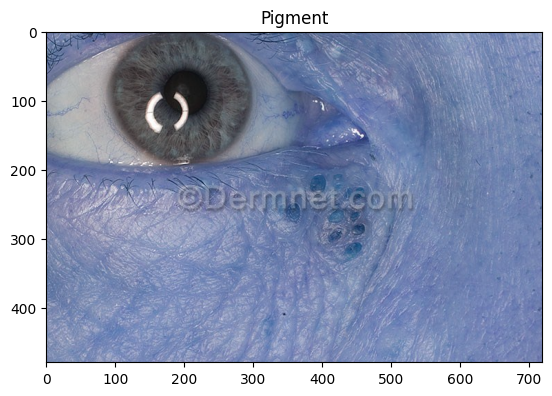

In [38]:
img = cv2.imread('./kaggle/input/skin-diseases/kaggle/train/4. Pigment/actinic-comedones-10.jpg')
plt.imshow(img)
plt.title('Pigment')

Text(0.5, 1.0, 'Benign')

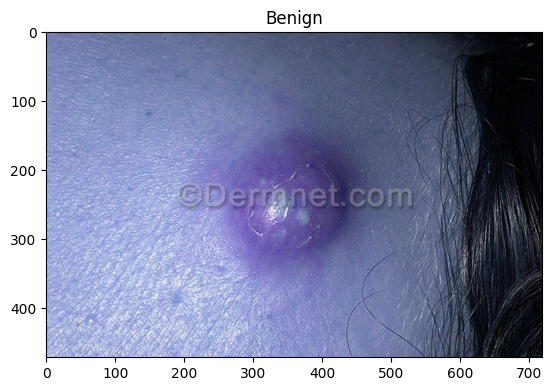

In [39]:
img = cv2.imread('./kaggle/input/skin-diseases/kaggle/train/5. Benign/20RupturedCyst.jpg')
plt.imshow(img)
plt.title('Benign')

Text(0.5, 1.0, 'Malignant')

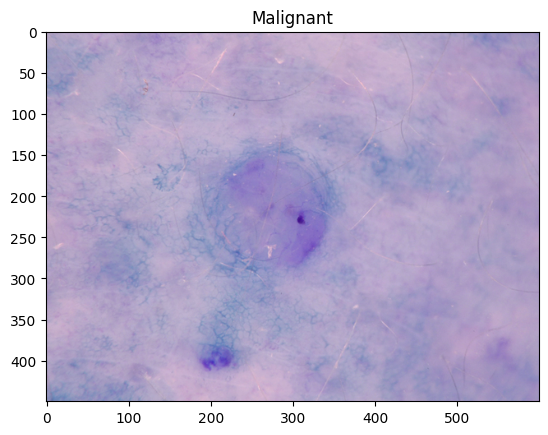

In [40]:
img = cv2.imread('./kaggle/input/skin-diseases/kaggle/train/6. Malign/ISIC_0024572.jpg')
plt.imshow(img)
plt.title('Malignant')

In [41]:
img_width = 256
img_height = 256

In [42]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = "./kaggle/input/skin-diseases/kaggle/train"
test_dir =  "./kaggle/input/skin-diseases/kaggle/test"
val_dir = "./kaggle/input/skin-diseases/kaggle/val"

train_data = image_dataset_from_directory(train_dir,label_mode = "categorical", image_size = (img_height, img_width), batch_size = 16, shuffle = True, seed = 42)
test_data = image_dataset_from_directory(test_dir,label_mode = "categorical", image_size = (img_height, img_width), batch_size = 16, shuffle = True, seed = 42)
val_data = image_dataset_from_directory(val_dir,label_mode = "categorical", image_size = (img_height, img_width), batch_size = 16, shuffle = True, seed = 42)

Found 30909 files belonging to 6 classes.
Found 3928 files belonging to 6 classes.
Found 3923 files belonging to 6 classes.


In [43]:
augmentation = Sequential()

In [44]:
augmentation.add(RandomBrightness(factor = 0.1))
augmentation.add(RandomFlip(mode = 'horizontal_and_vertical')) 
augmentation.add(RandomRotation(factor = 0.2, fill_mode = 'nearest'))

In [45]:
augmentation.build(input_shape = (None, img_height, img_width, 3))
augmentation.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_brightness_2 (Rando  (None, 256, 256, 3)       0         
 mBrightness)                                                    
                                                                 
 random_flip_2 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_rotation_2 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model = Sequential()

In [47]:
model.add(augmentation)
model.add(Conv2D(128, (2, 2), padding = 'same', input_shape = (img_height, img_width, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(3000, activation = 'relu'))
model.add(Dense(1500, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

In [48]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [49]:
model.build((None, img_height, img_width, 3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 256, 256, 128)     1664      
                                                                 
 batch_normalization_4 (Bat  (None, 256, 256, 128)     512       
 chNormalization)                                                
                                                                 
 average_pooling2d_1 (Avera  (None, 128, 128, 128)     0         
 gePooling2D)                                                    
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 128)    

In [50]:
# setting up a checkpoint based on the best validation accuracy, so far been discovered
chk_path = './kaggle/working/bestmodel.keras'

checkpoint = ModelCheckpoint(filepath = chk_path, monitor='val_accuracy', mode='max', save_best_only = True, verbose = 1)

In [51]:
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 5, mode = 'max', verbose = 1)

In [52]:
history = model.fit(train_data, validation_data = val_data, epochs = 100, batch_size = 16, callbacks = [early_stopping, checkpoint])

Epoch 1/100




1932/1932 [==============================] - ETA: 0s - loss: 1.4889 - accuracy: 0.4554
Epoch 1: val_accuracy improved from -inf to 0.47719, saving model to ./kaggle/working\bestmodel.keras
1932/1932 [==============================] - 13942s 7s/step - loss: 1.4889 - accuracy: 0.4554 - val_loss: 1.3414 - val_accuracy: 0.4772
Epoch 2/100
1932/1932 [==============================] - ETA: 0s - loss: 1.2114 - accuracy: 0.5034
Epoch 2: val_accuracy improved from 0.47719 to 0.48764, saving model to ./kaggle/working\bestmodel.keras
1932/1932 [==============================] - 13897s 7s/step - loss: 1.2114 - accuracy: 0.5034 - val_loss: 1.2228 - val_accuracy: 0.4876
Epoch 3/100
1932/1932 [==============================] - ETA: 0s - loss: 1.1589 - accuracy: 0.5229
Epoch 3: val_accuracy improved from 0.48764 to 0.55672, saving model to ./kaggle/working\bestmodel.keras
1932/1932 [==============================] - 13289s 7s/step - loss: 1.1589 - accuracy: 0.5229 - val_loss: 1.0878 - val_accuracy: 

KeyboardInterrupt: 

In [ ]:
best_model = load_model(chk_path)

In [ ]:
loss, acc = best_model.evaluate(test_data)

print(f"\nAccuracy = {acc}\nLoss = {loss}")

246/246 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.7511 - loss: 0.6745

Accuracy = 0.7517820596694946
Loss = 0.6699806451797485


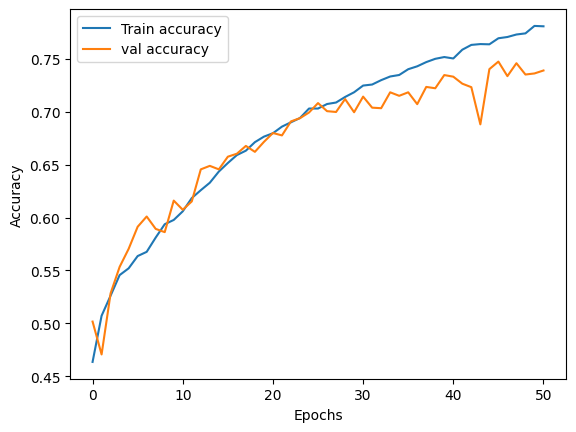

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')

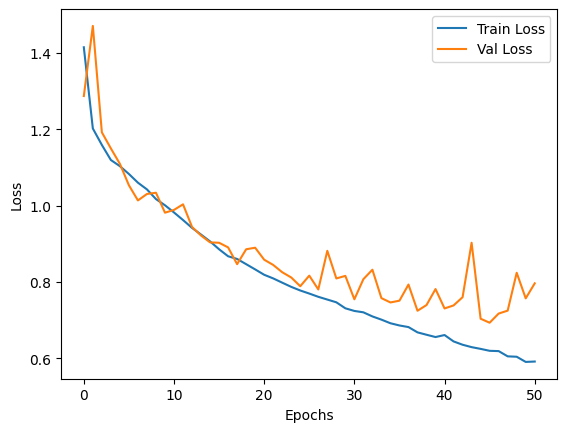

In [ ]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')

<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you For viewing this Notebook 😃, do upvote 🔼 if you like it and please feel free to provide any feedback.</em>
<p style="text-align:center"><img src="https://blogger.googleusercontent.com/img/a/AVvXsEi1sC5Ul4ByaLfXP6WkLb0HYRD_TR1jOJ9bP9w3IdgrJ1-IJJ70Q02xOlsan2BBcu586Cr9WrbWaGJK0EIit-POGGf2joerdbH_W3V7k-7QSIYhzP9a2COa-gZ8cNeleLJDbxOXvPlNE3zmoWzldgNEXsEPonDi_iy_5eeuO7bylPzgb1U3dy3_B07Elg=s480" width="480" height="200"></p>
